In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
plt.ion()
# Loads nicard and scope
manager.startModule('logic','cavitylogic')
filenames = glob.glob('./*data.dat')

outlier_cutoff = 1.5

In [3]:
fileNum=3
cavitylogic._load_full_sweep(filepath='', filename=filenames[fileNum])
cavitylogic._get_ramp_up_signgals()
cavitylogic.RampUp_signalSG_polyfit = cavitylogic._polyfit_SG(xdata=cavitylogic.RampUp_time,ydata=cavitylogic.RampUp_signalSG,
                                                        order=3, plot=False)
resonances = cavitylogic._peak_search(cavitylogic.RampUp_signalR)
corrected_resonances = cavitylogic._find_missing_resonances(resonances)

cavitylogic._get_ramp_up_signgals()
cavitylogic.first_sweep = cavitylogic.RampUp_signalR
cavitylogic.first_corrected_resonances = corrected_resonances
cavitylogic.first_RampUp_signalSG_polyfit = cavitylogic.RampUp_signalSG_polyfit 

cavitylogic.current_sweep_number = 2
fileNum=3
cavitylogic._load_full_sweep(filepath='', filename=filenames[fileNum])
cavitylogic._get_ramp_up_signgals()
cavitylogic.RampUp_signalR = np.roll(cavitylogic.first_sweep,20000)

[1]


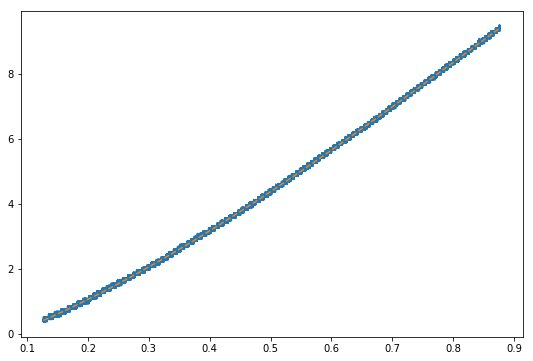

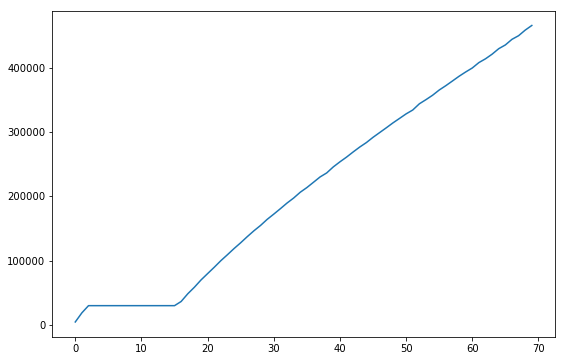

In [4]:
cavitylogic.RampUp_signalSG_polyfit = cavitylogic._polyfit_SG(xdata=cavitylogic.RampUp_time,ydata=cavitylogic.RampUp_signalSG,
                                                        order=3, plot=True)
resonances = cavitylogic._peak_search(cavitylogic.RampUp_signalR)
print(cavitylogic._check_for_outliers(resonances,1.5))
corrected_resonances = cavitylogic._find_missing_resonances(resonances)
plt.plot(corrected_resonances)

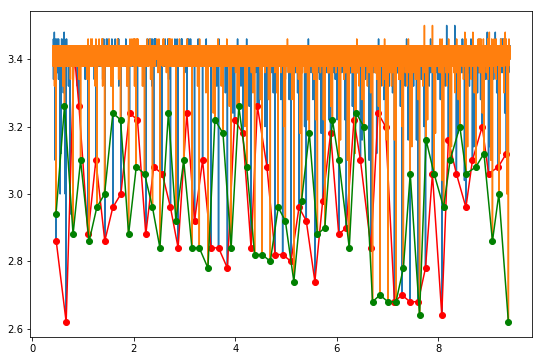

In [5]:
plt.plot(cavitylogic.RampUp_signalSG_polyfit, cavitylogic.RampUp_signalR)
plt.plot(cavitylogic.RampUp_signalSG_polyfit[corrected_resonances],  cavitylogic.RampUp_signalR[corrected_resonances],'r',marker ='o')
plt.plot(cavitylogic.first_RampUp_signalSG_polyfit, cavitylogic.first_sweep)
plt.plot(cavitylogic.first_RampUp_signalSG_polyfit[cavitylogic.first_corrected_resonances],  cavitylogic.first_sweep[cavitylogic.first_corrected_resonances],'g',marker ='o')
plt.show()


25
127936 107936


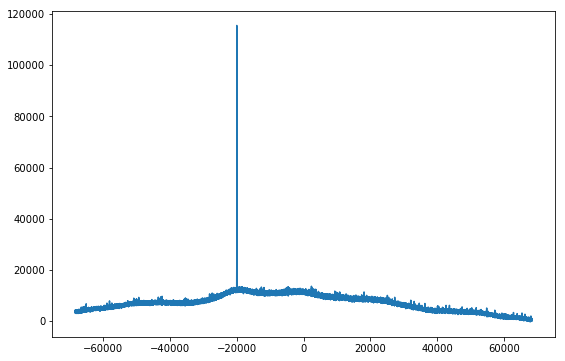

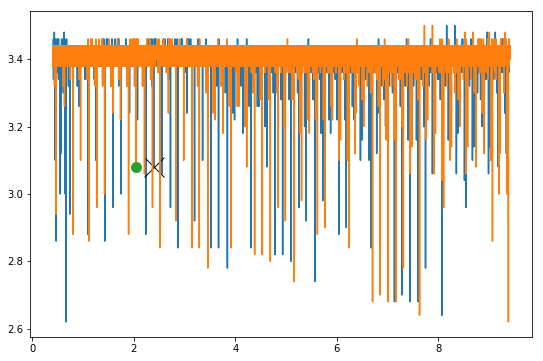

In [7]:
print(cavitylogic.get_target_mode(corrected_resonances))
new_index = cavitylogic.first_corrected_resonances[cavitylogic.current_mode_number]
index = cavitylogic.first_corrected_resonances[cavitylogic.current_mode_number] - cavitylogic.t_delay_list[-1]
print(index, new_index)

plt.plot(cavitylogic.RampUp_signalSG_polyfit, cavitylogic.RampUp_signalR)
plt.plot(cavitylogic.RampUp_signalSG_polyfit[index], cavitylogic.RampUp_signalR[index],'x',markersize=20,color='k')
plt.plot(cavitylogic.first_RampUp_signalSG_polyfit, cavitylogic.first_sweep)
plt.plot(cavitylogic.first_RampUp_signalSG_polyfit[new_index], cavitylogic.first_sweep[new_index],'o',markersize=10)
plt.show()


In [ ]:
first_resonances = cavitylogic.get_first_sweep()

In [ ]:
cavitylogic.ramp_popt = cavitylogic._fit_ramp(xdata=cavitylogic.time_trim[::10], ydata=cavitylogic.volts_trim[cavitylogic.ramp_channel,::10])
Modes = cavitylogic._ni.sweep_function(cavitylogic.RampUp_time[first_resonances],*cavitylogic.ramp_popt)

In [ ]:
line_width_measurement(Modes,target_mode = cavitylogic.current_mode_number, repeat=10, freq=40)